In [63]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols, diff

%matplotlib inline

# Example 1 - A simple cost function
## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1
def df(x):
    return x*2 + 1

In [3]:
x_1 = np.linspace(start=-3, stop=3, num=500)

## Python Loops & Gradient Descent

In [4]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0000000001

x_list = [new_x]
slope_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print(n)
        break

    x_list.append(new_x)
    slope_list.append(df(new_x))
        
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

102
Local minimum occurs at: -0.49999999963496317
Slope or df(x) value at this point is: 7.300736681870035e-10
f(x) value or cost at this point is: 0.75


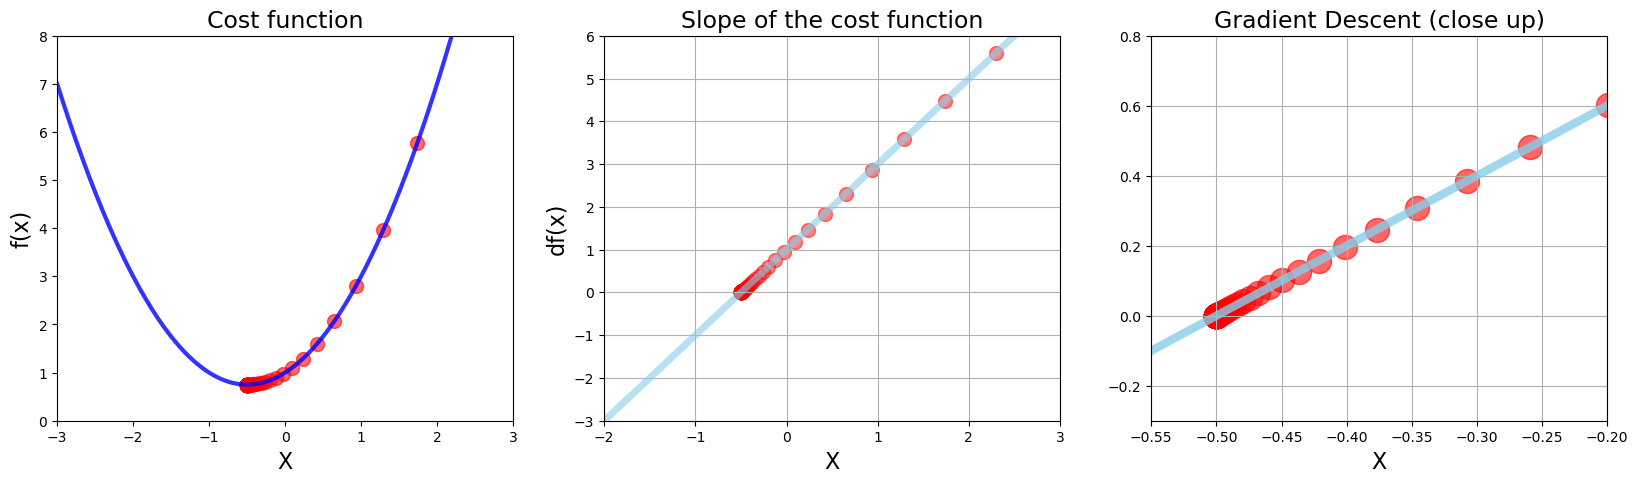

In [5]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [6]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8 * x

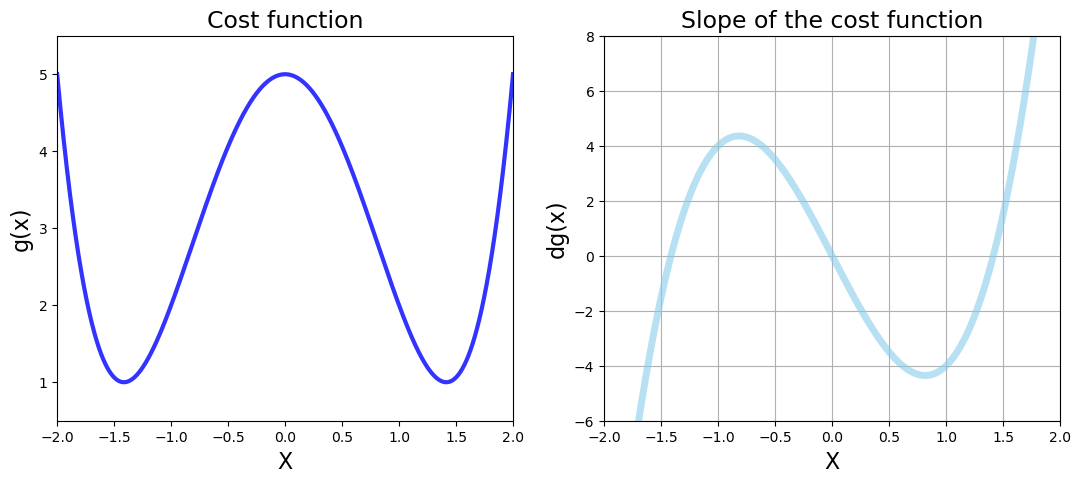

In [7]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# values = np.array(x_list)
# plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
# plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# # 3 Chart: Derivative (Close Up)
# plt.subplot(1, 3, 3)

# plt.title('Gradient Descent (close up)', fontsize=17)
# plt.xlabel('X', fontsize=16)
# plt.grid()
# plt.xlim(-0.55, -0.2)
# plt.ylim(-0.3, 0.8)

# plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

# plt.show()

## Gradient Descent as a Python Function

In [8]:
# Gradient Descent
def gradient_descent(derivative_function, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
   
    x_list = [new_x]
    slope_list = [derivative_function(new_x)]
    
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_function(previous_x)
        new_x = previous_x - learning_rate * gradient
    
        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_function(new_x))
        
        if step_size < precision:
            break
    
        
    return new_x, x_list, slope_list

In [9]:
local_min, list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=2)
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at: 1.4159909120185952
Number of steps:  14


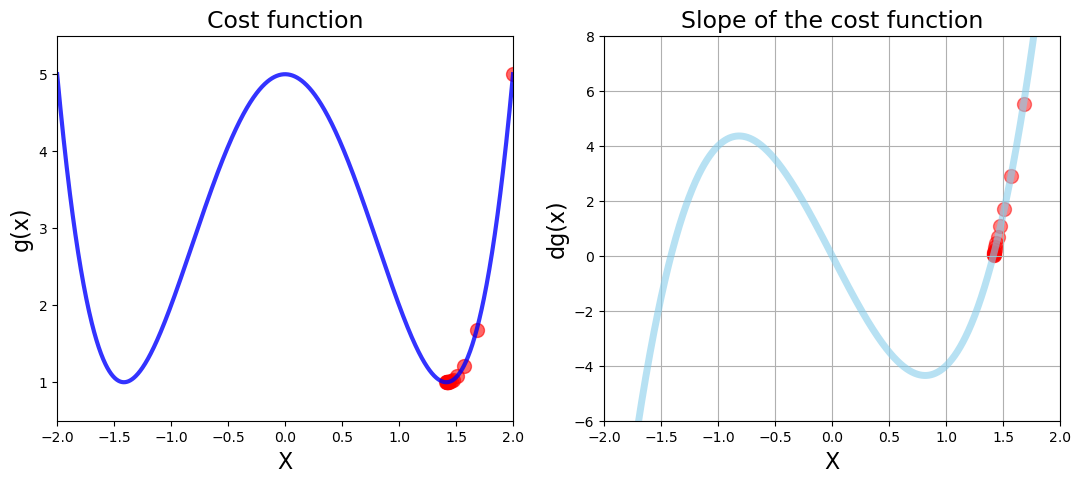

In [10]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

# # 3 Chart: Derivative (Close Up)
# plt.subplot(1, 3, 3)

# plt.title('Gradient Descent (close up)', fontsize=17)
# plt.xlabel('X', fontsize=16)
# plt.grid()
# plt.xlim(-0.55, -0.2)
# plt.ylim(-0.3, 0.8)

# plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
# plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

# plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [11]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3

In [12]:
local_min, list_x, deriv_list = gradient_descent(derivative_function=dh, 
                                                 initial_guess=-0.2,
                                                 max_iter=70
                                                )
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at: -2071072.4470816324
Number of steps:  71


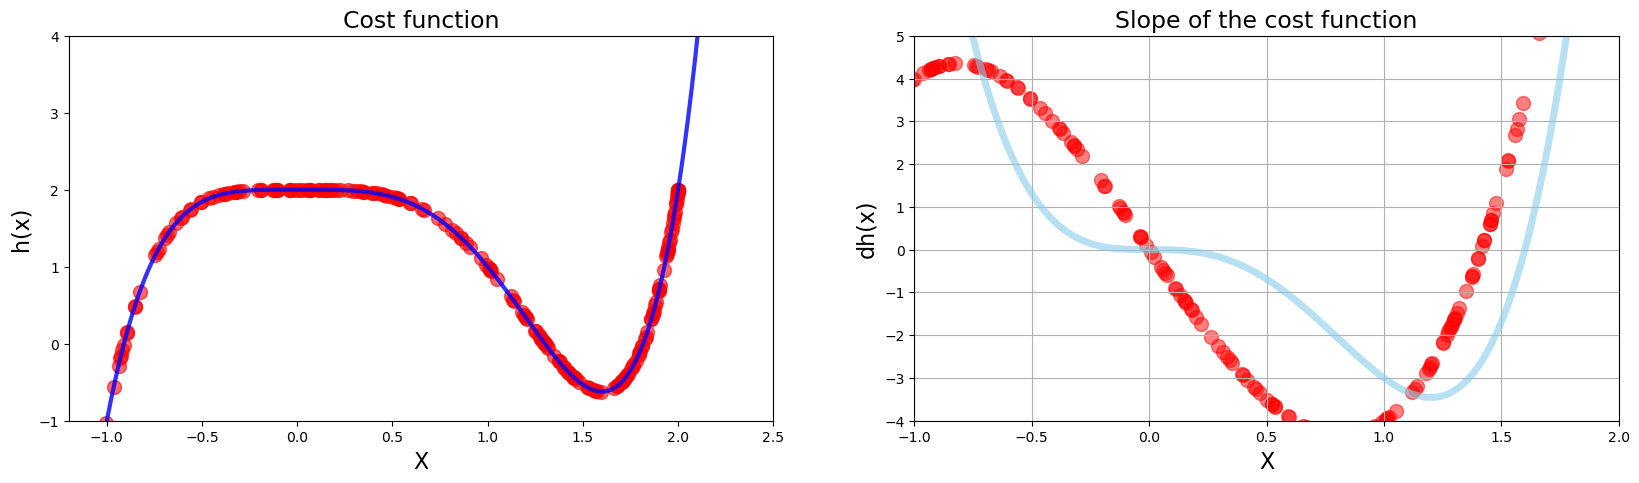

Local min occurs at: -1.831405095369394
Cost at this minimum is:  -41.10183351695649
Number of steps:  301


In [18]:
plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))


# The Learning Rate

Local min occurs at: 1.9154885924295848
Number of steps:  501


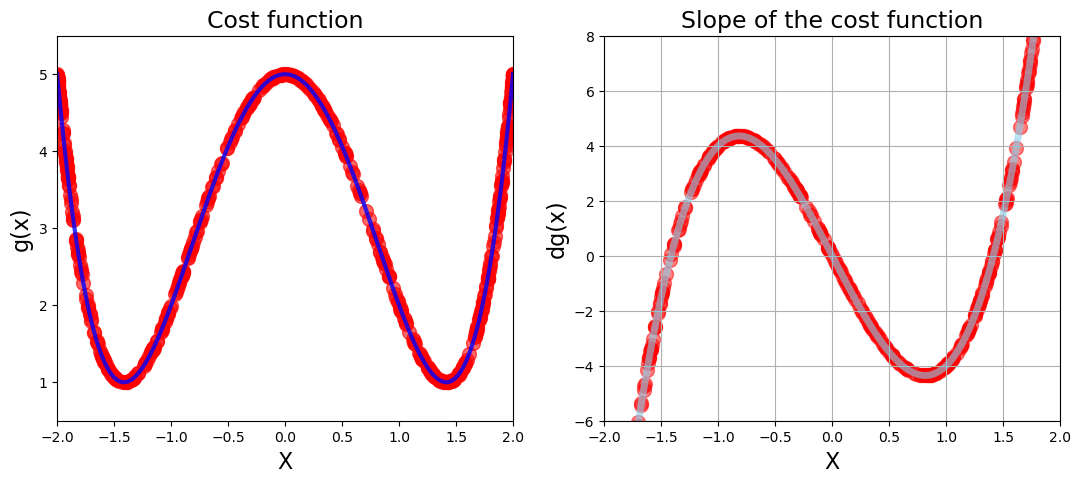

In [21]:
local_min, list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=1.9, learning_rate=0.02, max_iter=500)
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

plt.figure(figsize=[20, 5])
# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)
plt.show()


Local min occurs at: 1.415879815113846
Number of steps:  14


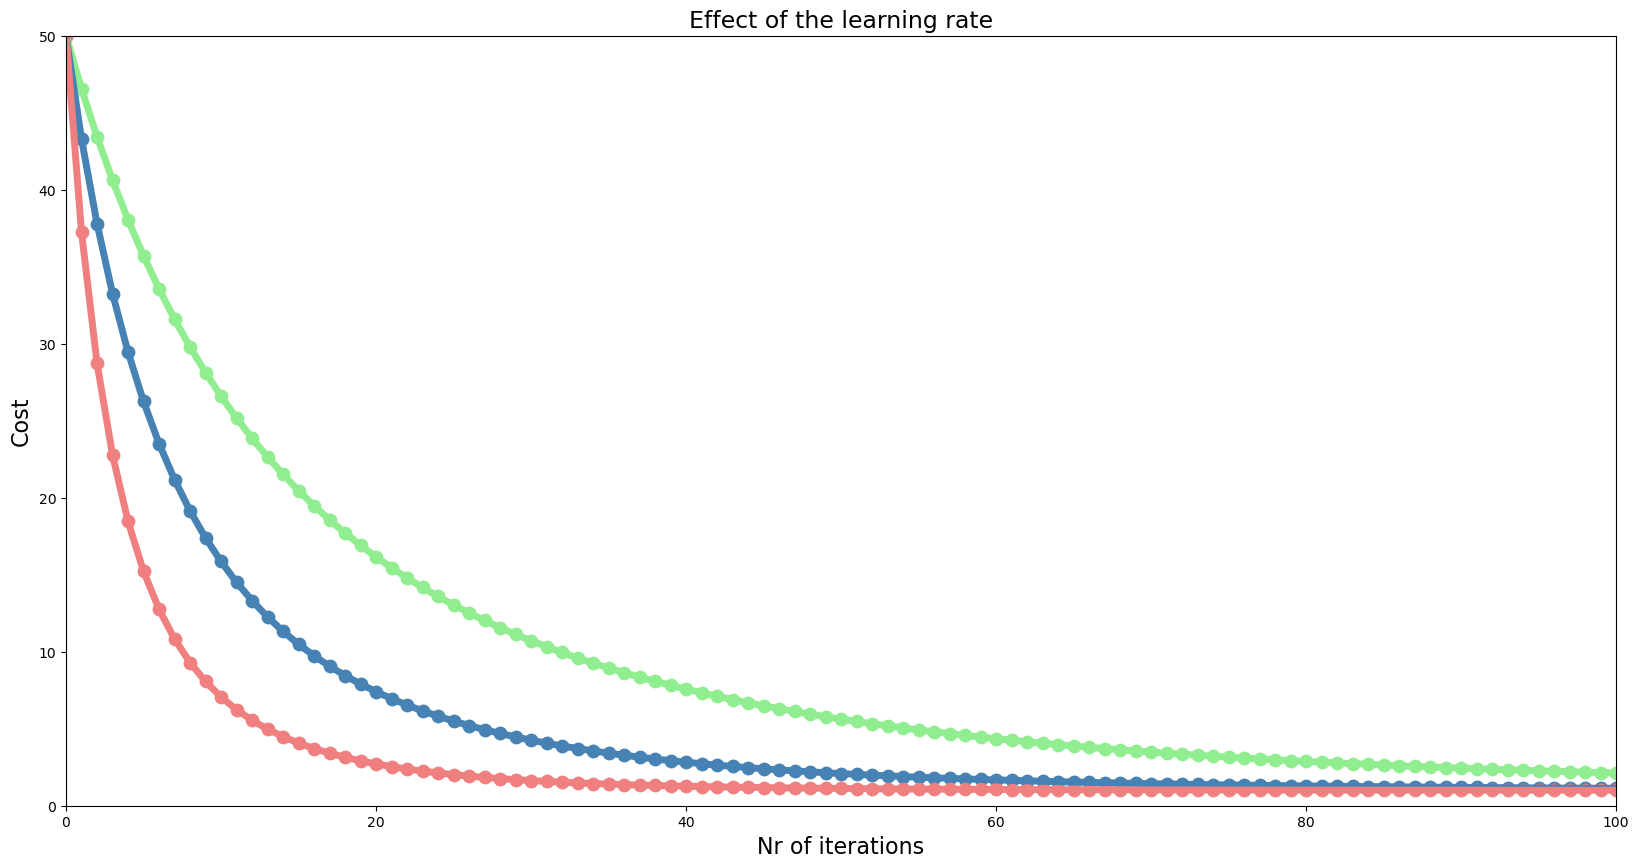

In [28]:
#Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_function=dg, initial_guess=3, learning_rate=0.0005, precision=0.0001, max_iter=n)
print('Local min occurs at:', local_min)
print('Number of steps: ', len(list_x))

mid_gamma = gradient_descent(derivative_function=dg, initial_guess=3, learning_rate=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_function=dg, initial_guess=3, learning_rate=0.002, precision=0.0001, max_iter=n)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)
# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='lightcoral', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='lightcoral', s=80)
plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

In [48]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [43]:
# Make our x and y data 
X_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', X_4.shape)

X_4, y_4 = np.meshgrid(X_4, y_4)
print('Array after meshgrid: ', X_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


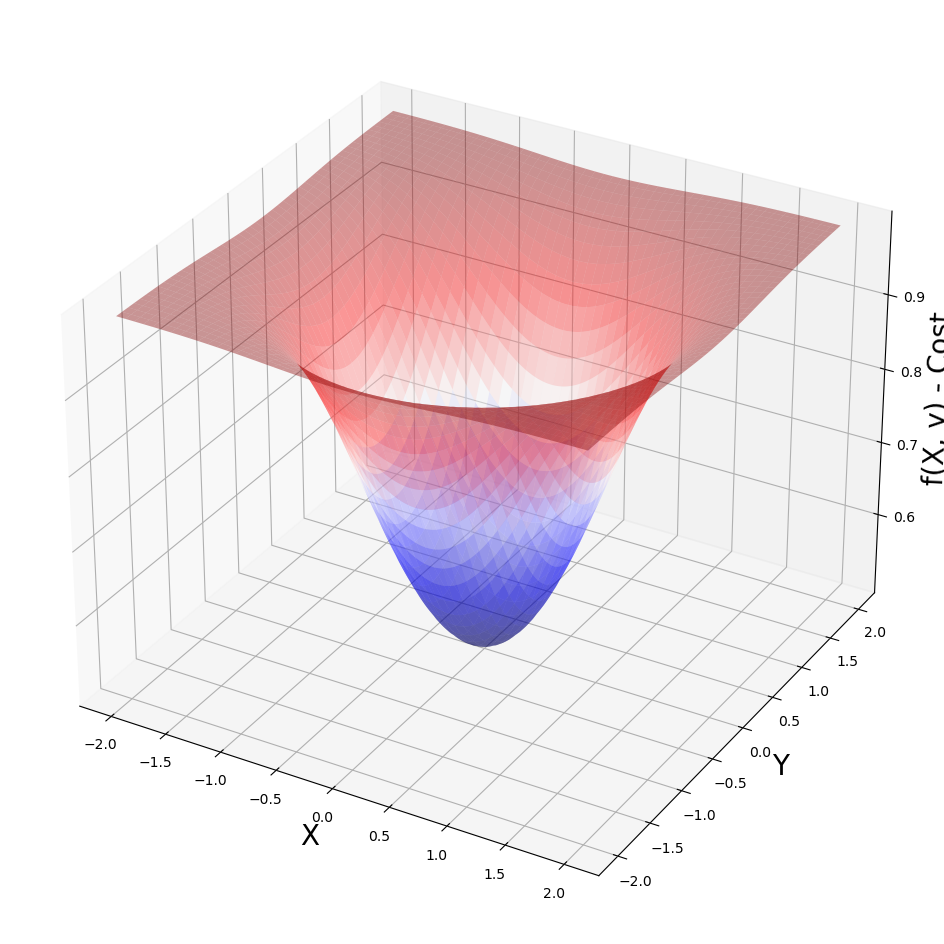

In [62]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X, y) - Cost', fontsize=20)

ax.plot_surface(X_4, y_4, f(X_4, y_4), cmap=cm.seismic, alpha=0.4)

plt.show()


## Partial Derivatives & Symbolic Computation

In [67]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a,b), a))
f(a, b).evalf(subs={a:1.8, b:1.0})

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


0.990604794032582